# Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
# Libraries

import numpy as np
import pandas as pd

import random

import seaborn as sns
import matplotlib.pylab as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [5]:
# your code here

def roll_dice_simulation():
    # Simulate rolling a dice 10 times
    dice_rolls = random.choices(range(1, 7), k=10)
    
    # Create a DataFrame to store the results
    df = pd.DataFrame(dice_rolls, columns=['Dice Roll'])
    
    return df

# Run the simulation
df = roll_dice_simulation()

df


,Dice Roll
0,3
1,2
2,4
3,1
4,5
5,4
6,5
7,4
8,1
9,5


#### 2.- Plot the results sorted by value.

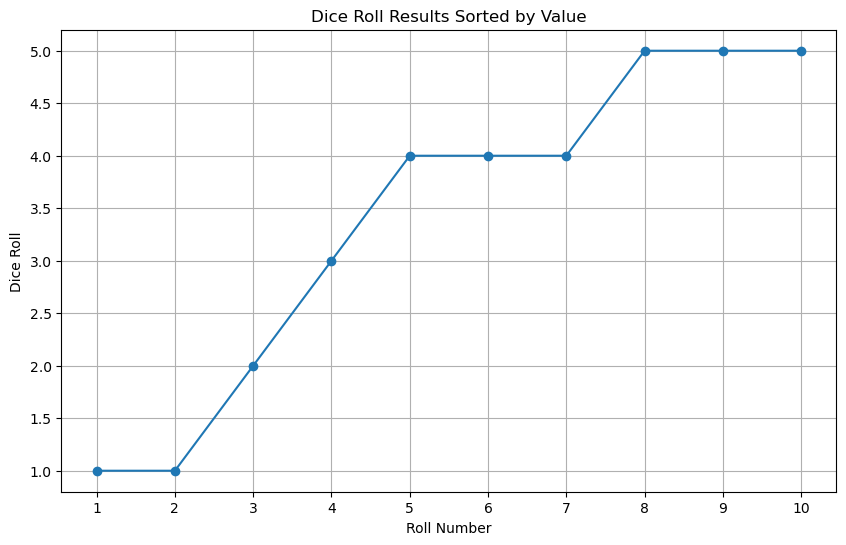

In [7]:
# your code here

# Ordeno los resultados por los valores
df_sorted = df.sort_values(by='Dice Roll').reset_index(drop=True)

# Hago el plot de los resultados ordenados
plt.figure(figsize=(10, 6))
plt.plot(df_sorted.index + 1, df_sorted['Dice Roll'], marker='o', linestyle='-')
plt.title('Dice Roll Results Sorted by Value')
plt.xlabel('Roll Number')
plt.ylabel('Dice Roll')
plt.xticks(df_sorted.index + 1)
plt.grid(True)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

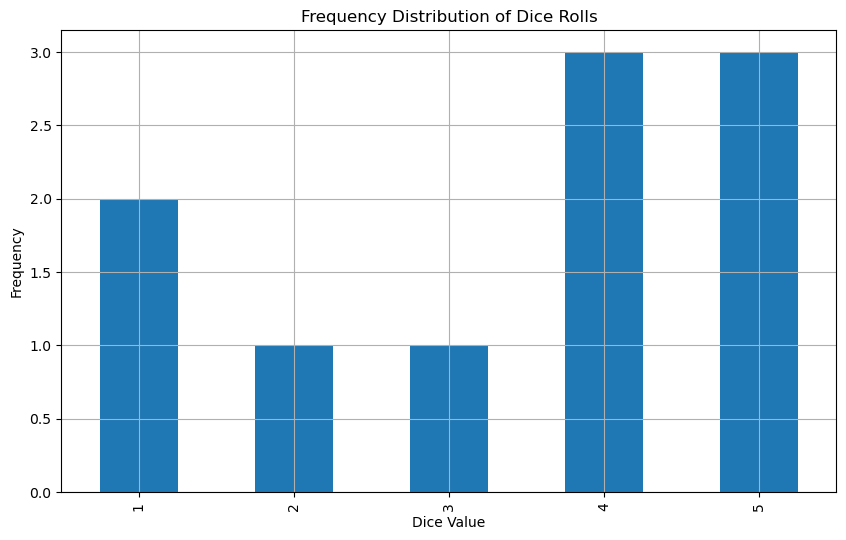

In [8]:
# Calculamos la frecuencia de distribución.

frequency_distribution = df['Dice Roll'].value_counts().sort_index()


# Hacemos el plot de la frecuencia de distribución

plt.figure(figsize=(10, 6))
frequency_distribution.plot(kind='bar')
plt.title('Frequency Distribution of Dice Rolls')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
def calculate_mean(data):
    # Sum all the observations
    total_sum = sum(data)
    
    # Divide by the number of observations
    mean = total_sum / len(data)
    
    return mean

In [10]:

# Calculate the mean using the custom function
mean_value = calculate_mean(df['Dice Roll'])
print(f"Mean of dice rolls: {mean_value}")

Mean of dice rolls: 3.4


In [12]:
# Calculate the frequency distribution
frequency_distribution = df['Dice Roll'].value_counts().sort_index()

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [14]:
# your code here

def calculate_mean_from_freq_distribution(frequency_distribution):
    # Calculate the total sum using the frequency distribution
    total_sum = sum(value * count for value, count in frequency_distribution.items())
    
    # Calculate the total number of observations
    total_observations = sum(frequency_distribution.values())
    
    # Calculate the mean
    mean = total_sum / total_observations
    
    return mean

# Calculate the frequency distribution
frequency_distribution = df['Dice Roll'].value_counts().sort_index().to_dict()

# Calculate the mean using the frequency distribution
mean_value_from_freq = calculate_mean_from_freq_distribution(frequency_distribution)
print(f"Mean of dice rolls (from frequency distribution): {mean_value_from_freq}")


Mean of dice rolls (from frequency distribution): 3.4


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [15]:
# your code here


def calculate_median(data):
    # Sort the data
    sorted_data = sorted(data)
    
    # Calculate the number of observations
    n = len(sorted_data)
    
    # Find the middle index
    middle = n // 2
    
    # Compute the median based on the number of observations
    if n % 2 == 1:  # Odd number of observations
        median = sorted_data[middle]
    else:  # Even number of observations
        median = (sorted_data[middle - 1] + sorted_data[middle]) / 2
    
    return median

In [16]:

# Calculate the median using the custom function
median_value = calculate_median(df['Dice Roll'])
print(f"Median of dice rolls: {median_value}")

Median of dice rolls: 4.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [17]:
# your code here

def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    # Q2 (median)
    Q2 = calculate_median(sorted_data)
    
    # Lower half for Q1
    if n % 2 == 0:
        lower_half = sorted_data[:n // 2]
    else:
        lower_half = sorted_data[:n // 2]
    
    # Upper half for Q3
    if n % 2 == 0:
        upper_half = sorted_data[n // 2:]
    else:
        upper_half = sorted_data[n // 2 + 1:]
    
    # Q1 and Q3
    Q1 = calculate_median(lower_half)
    Q3 = calculate_median(upper_half)
    
    # Q0 and Q4
    Q0 = sorted_data[0]
    Q4 = sorted_data[-1]
    
    return Q0, Q1, Q2, Q3, Q4


# Calculate the quartiles using the custom function
quartiles = calculate_quartiles(df['Dice Roll'])
print(f"Quartiles of dice rolls: Q0={quartiles[0]}, Q1={quartiles[1]}, Q2={quartiles[2]}, Q3={quartiles[3]}, Q4={quartiles[4]}")


Quartiles of dice rolls: Q0=1, Q1=2, Q2=4.0, Q3=5, Q4=5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

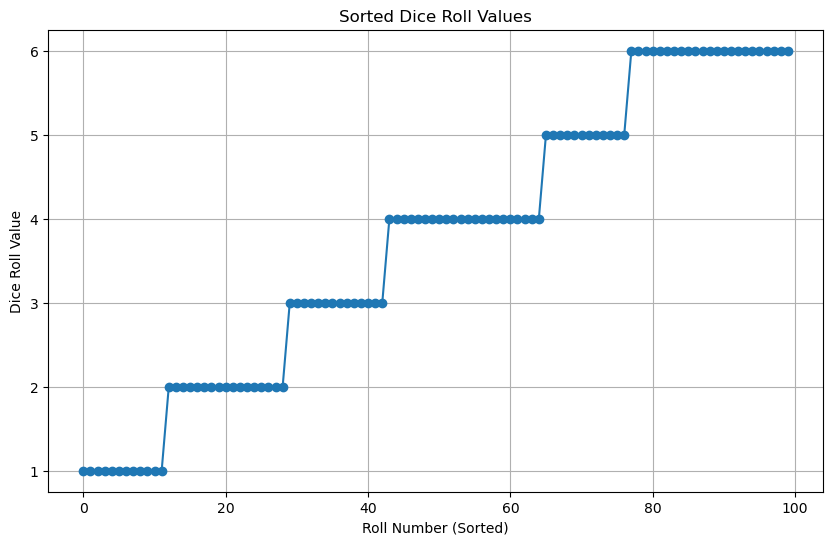

In [27]:
# your code here

# Leo el csv
df_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')

# Sort the values in the 'value' column
sorted_values = df_hundred['value'].sort_values().reset_index(drop=True)

# Plot the sorted values
plt.figure(figsize=(10, 6))
plt.plot(sorted_values, marker='o', linestyle='-')
plt.title('Sorted Dice Roll Values')
plt.xlabel('Roll Number (Sorted)')
plt.ylabel('Dice Roll Value')
plt.grid(True)
plt.show()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [20]:
# your code here

# Creamos la función para calcular la media de los valores que obtenemos con anterioridad.
def calculate_mean(data):
    
# Sumamos todas las observaciones y las dividimos por el total de observaciones.
    total_sum = sum(data)
    mean = total_sum / len(data)
    
    return mean

# Calculamos la media con la función
mean_value_hundred = calculate_mean(df_hundred['value'])
print(f"Mean of hundred dice rolls: {mean_value_hundred}")

Mean of hundred dice rolls: 3.74


#### 3.- Now, calculate the frequency distribution.


In [23]:
# your code here

frequency_distribution = df_hundred['value'].value_counts().sort_index()

frequency_distribution

value
1    12
2    17
3    14
4    22
5    12
6    23
Name: count, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

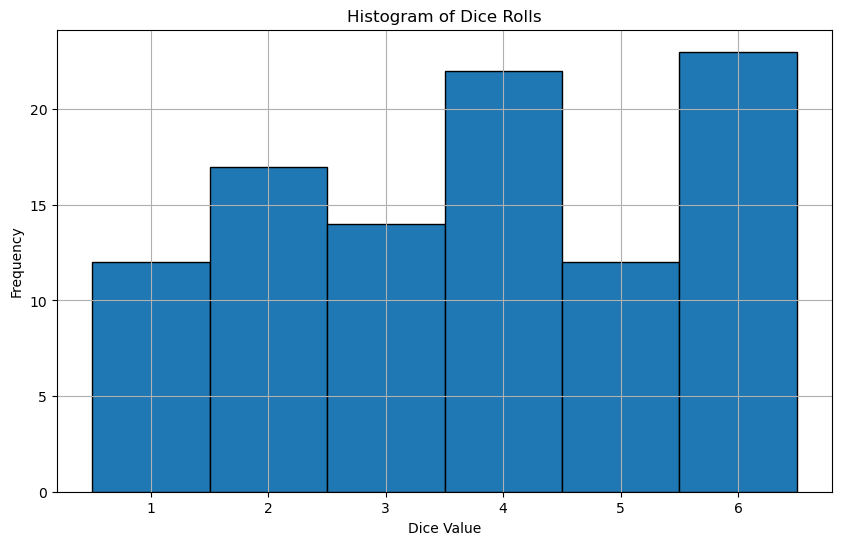

In [24]:
# your code here

plt.figure(figsize=(10, 6))
plt.hist(df_hundred['value'], bins=range(1, 8), edgecolor='black', align='left')
plt.title('Histogram of Dice Rolls')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()

In [ ]:
"""
* - Values: cada barra representa la frecuencia de los valores entre 1 y 6. 
- Shapes: El histograma representa los valores de forma uniforme

* No se puede dibujar la media de esta DataFrame en un histograma.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

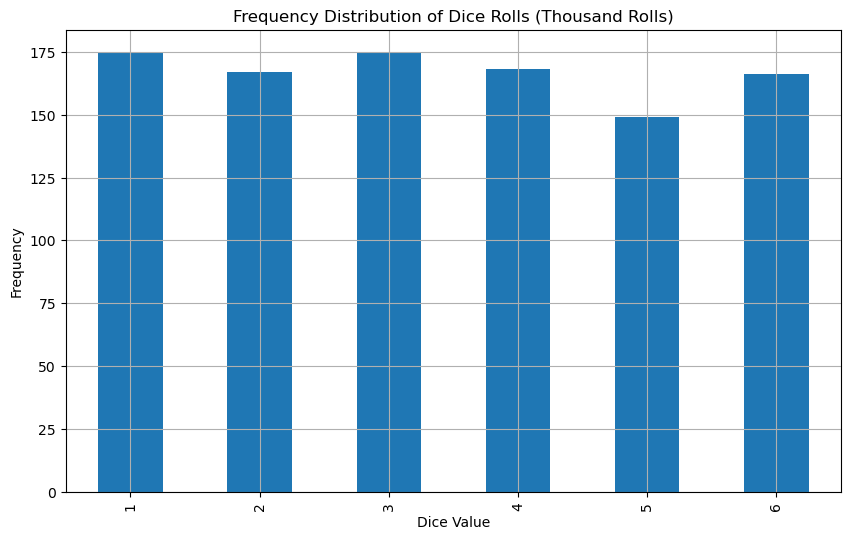

value
1    175
2    167
3    175
4    168
5    149
6    166
Name: count, dtype: int64

In [28]:
# your code here

# Leo el csv
df_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')

# Calculamos la frecuencia de distribución
frequency_distribution_thousand = df_thousand['value'].value_counts().sort_index()

# grafica
plt.figure(figsize=(10, 6))
frequency_distribution_thousand.plot(kind='bar')
plt.title('Frequency Distribution of Dice Rolls (Thousand Rolls)')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


frequency_distribution_thousand

In [ ]:
"""
Si ha cambiado. La frecuencia de distribucion es mas uniforme.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

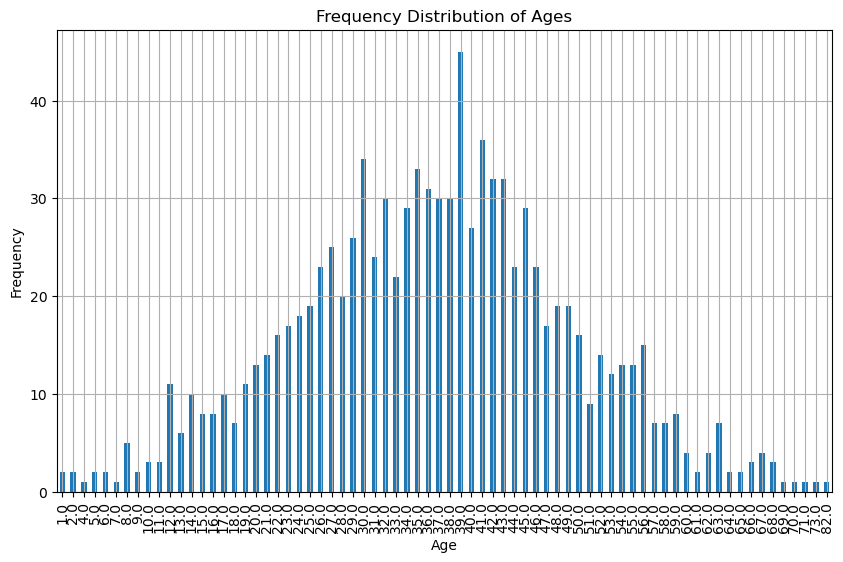

observation
1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: count, Length: 72, dtype: int64

In [35]:
# your code here

# Leo el csv
df_ages = pd.read_csv('../data/ages_population.csv')

# Calculamos la frecuencia de distribución del dataset
frequency_distribution_ages = df_ages['observation'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
frequency_distribution_ages.plot(kind='bar')
plt.title('Frequency Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Frecuencia de distribucion
frequency_distribution_ages

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [37]:
# your code here

# Calculamos la media
mean_age = df_ages['observation'].mean()

# Calculamos la desviación estandar
std_dev_age = df_ages['observation'].std()

# Display the mean and standard deviation
print(f"Mean age: {mean_age}")
print(f"Standard deviation of age: {std_dev_age}")

Mean age: 36.56
Standard deviation of age: 12.816499625976762


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

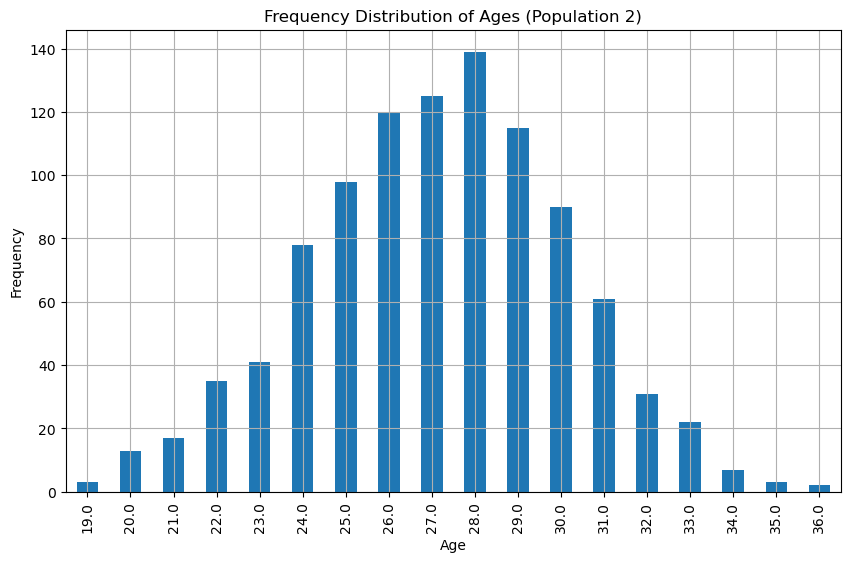

observation
19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: count, dtype: int64

In [40]:
# your code here

df_ages2 = pd.read_csv('../data/ages_population2.csv')

# Calculamos la frecuencia de distribucion
frequency_distribution_ages2 = df_ages2['observation'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
frequency_distribution_ages2.plot(kind='bar')
plt.title('Frequency Distribution of Ages (Population 2)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Datos de frecuencia de distribucion
frequency_distribution_ages2

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Aunque los datos en la segunda grafica estan mas reducidos, las dos tablas representan lo mismo. El dibujo es muy similar. 
Aunque en este segundo los valores son más bajos, pero porque el valor mas alto es la mitad que en el paso 1.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [41]:
# your code here

# Calculamos la media
mean_age = df_ages2['observation'].mean()

# Calculamos la desviación estandar
std_dev_age = df_ages2['observation'].std()

# Display the mean and standard deviation
print(f"Mean age: {mean_age}")
print(f"Standard deviation of age: {std_dev_age}")

Mean age: 27.155
Standard deviation of age: 2.969813932689186


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

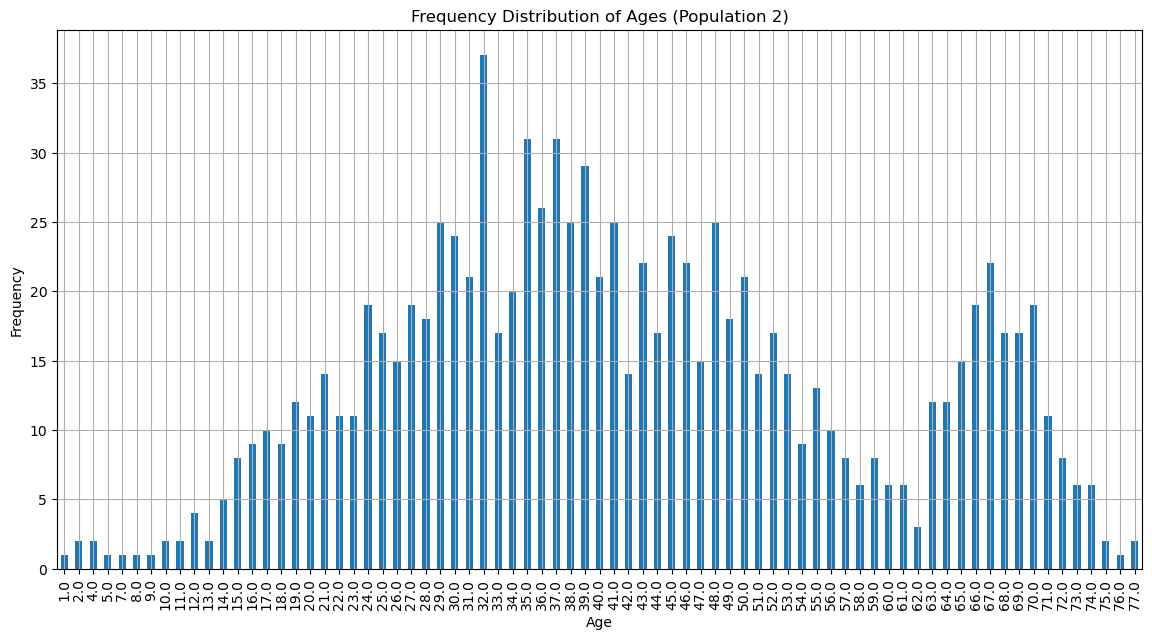

In [46]:
# your code here


df_ages3 = pd.read_csv('../data/ages_population3.csv')

# Calculate the frequency distribution
frequency_distribution = df_ages3["observation"].value_counts().sort_index()

# Plot the frequency distribution
plt.figure(figsize=(14, 7))
frequency_distribution.plot(kind='bar')
plt.title('Frequency Distribution of Ages (Population 2)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [47]:
# your code here

# Calculate the mean and standard deviation
mean = np.mean(df_ages3['observation'])
std_dev = np.std(df_ages3['observation'])

print("Mean:", mean)
print("Standard Deviation:", std_dev)

Mean: 41.989
Standard Deviation: 16.136631587788084


In [ ]:
"""
Los valores aumentan y el dibujo tambien cambia. A partir de los 62 años vuelve a aumentar los datos.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [48]:
# your code here

quartiles = df_ages['observation'].quantile([0.25, 0.5, 0.75])

print("First Quartile (Q1):", quartiles[0.25])
print("Median (Q2):", quartiles[0.5])
print("Third Quartile (Q3):", quartiles[0.75])

First Quartile (Q1): 28.0
Median (Q2): 37.0
Third Quartile (Q3): 45.0


In [ ]:
"""
Esta como se supone que te tiene que dar.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [49]:
# your code here

# Percentiles adicionales
percentiles = df_ages3['observation'].quantile([0.1, 0.90, 0.95, 0.99])

print("10th Percentile:", percentiles[0.1])
print("90th Percentile:", percentiles[0.90])
print("95th Percentile:", percentiles[0.95])
print("99th Percentile:", percentiles[0.99])

10th Percentile: 22.0
90th Percentile: 67.0
95th Percentile: 70.0
99th Percentile: 74.0


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""